In [22]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(r"D:\UMA\PROJECT VALUATION ANALYSIS\unicorns till sep 2022.csv")
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,04-07-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12-01-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,01-08-2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [24]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
count,1186,1186,1186,1186,1186,1186,1168
unique,1183,222,695,48,286,34,1152
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,271,9,636,168,239,3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [26]:
df.shape

(1186, 7)

In [27]:
df.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

In [28]:
df= df.dropna(subset=['Investors'])
df.shape

(1168, 7)

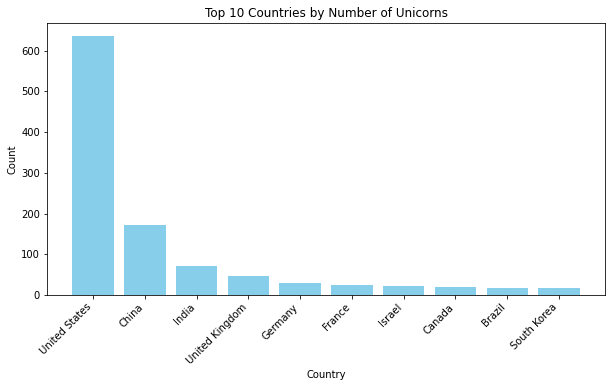

In [29]:
#Top 10 Countries by Unicorn Count
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_countries.index, top_countries.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Number of Unicorns')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


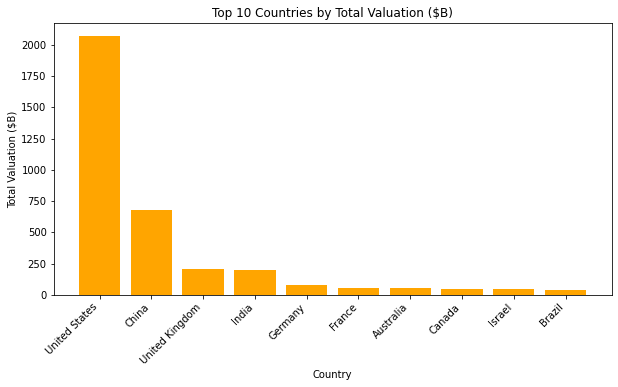

In [30]:
#Top 10 countries by total valuation
df['Valuation ($B)'] = df['Valuation ($B)'].replace({'\$':''}, regex=True).astype(float)

top_value = df.groupby('Country')['Valuation ($B)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_value.index, top_value.values, color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Total Valuation ($B)')
plt.xlabel('Country')
plt.ylabel('Total Valuation ($B)')
plt.show()


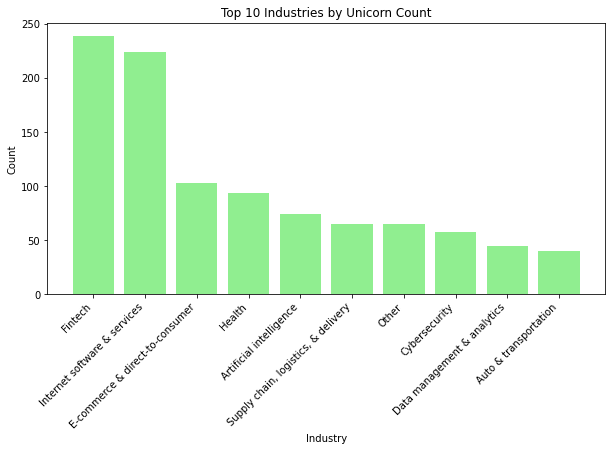

In [31]:
#Top industries by number of unicorns
top_industries = df['Industry'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_industries.index, top_industries.values, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Industries by Unicorn Count')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()


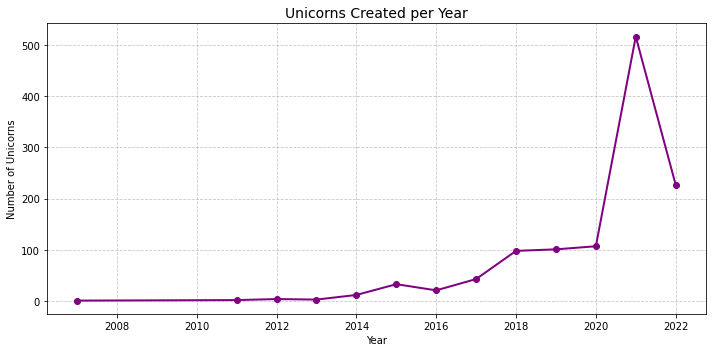

In [32]:
#Trend of unicorns over years
# Convert to datetime safely (handles mixed formats)
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce', format='mixed')

# Extract Year
df['Year'] = df['Date Joined'].dt.year

# Count unicorns per year
yearly = df['Year'].value_counts().sort_index()

#Convert index and values to NumPy arrays before plotting
x = yearly.index.to_numpy()
y = yearly.values

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', color='purple', linewidth=2)
plt.title('Unicorns Created per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
#Feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure valuation is numeric
df['Valuation ($B)'] = df['Valuation ($B)'].replace({'\$':''}, regex=True).astype(float)

# Basic features for prediction
df['Month'] = df['Date Joined'].dt.month

# Select relevant columns
features = ['Year', 'Month', 'Country', 'Industry']
target = 'Valuation ($B)'

# Drop missing values (if any)
df_model = df.dropna(subset=features + [target])

# Split features and target
X = df_model[features]
y = df_model[target]

# Check feature types
print(X.head())
print("\nTarget sample:")
print(y.head())


   Year  Month        Country                         Industry
0  2017      4          China          Artificial intelligence
1  2012     12  United States                            Other
2  2018      7          China  E-commerce & direct-to-consumer
3  2014      1  United States                          Fintech
4  2018      1      Australia     Internet software & services

Target sample:
0    140.0
1    127.0
2    100.0
3     95.0
4     40.0
Name: Valuation ($B), dtype: float64


Linear Regression RMSE: 3.440
Linear Regression R2: -0.513


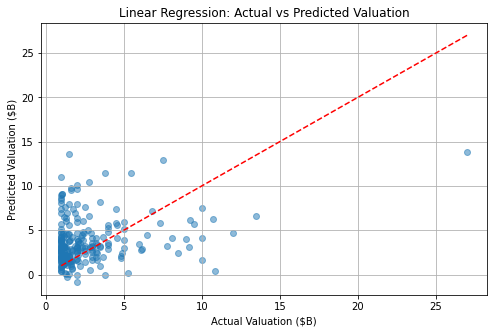

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target selection
features = ['Year', 'Month', 'Country', 'Industry']
target = 'Valuation ($B)'

# Drop missing values on needed columns
df_lr = df.dropna(subset=features + [target])
X_lr = df_lr[features]
y_lr = df_lr[target]

# Split train/test
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Column transformer for preprocessing
num_features = ['Year', 'Month']
cat_features = ['Country', 'Industry']
preprocessor_lr = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Pipeline for Linear Regression
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('model', LinearRegression())
])

# Fit and predict
pipeline_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = pipeline_lr.predict(X_test_lr)

# Metrics
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
r2_lr = r2_score(y_test_lr, y_pred_lr)
print(f'Linear Regression RMSE: {rmse_lr:.3f}')
print(f'Linear Regression R2: {r2_lr:.3f}')

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test_lr, y_pred_lr, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Valuation')
plt.xlabel('Actual Valuation ($B)')
plt.ylabel('Predicted Valuation ($B)')
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()


Random Forest RMSE: 5.642
Random Forest R2: -3.070


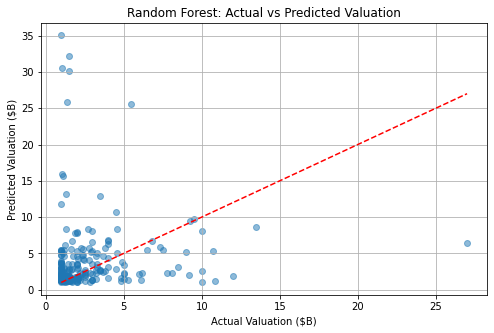

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Drop missing values on needed columns
df_rf = df.dropna(subset=features + [target])
X_rf = df_rf[features]
y_rf = df_rf[target]

# Split train/test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Column transformer for preprocessing
num_features = ['Year', 'Month']
cat_features = ['Country', 'Industry']
preprocessor_rf = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Pipeline for Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Fit and predict
pipeline_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = pipeline_rf.predict(X_test_rf)

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
r2_rf = r2_score(y_test_rf, y_pred_rf)
print(f'Random Forest RMSE: {rmse_rf:.3f}')
print(f'Random Forest R2: {r2_rf:.3f}')

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.5)
plt.title('Random Forest: Actual vs Predicted Valuation')
plt.xlabel('Actual Valuation ($B)')
plt.ylabel('Predicted Valuation ($B)')
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()


In [36]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf],
    'R2 Score': [r2_lr, r2_rf]
})

print(results)


               Model      RMSE  R2 Score
0  Linear Regression  3.439979 -0.513344
1      Random Forest  5.641645 -3.070403


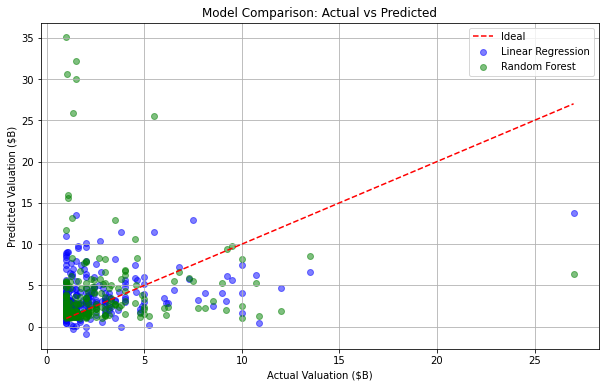

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_lr, y_pred_lr, color='blue', label='Linear Regression', alpha=0.5)
plt.scatter(y_test_rf, y_pred_rf, color='green', label='Random Forest', alpha=0.5)
plt.plot([min(y_test_lr.min(),y_test_rf.min()), max(y_test_lr.max(),y_test_rf.max())],
         [min(y_test_lr.min(),y_test_rf.min()), max(y_test_lr.max(),y_test_rf.max())],
         color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Valuation ($B)')
plt.ylabel('Predicted Valuation ($B)')
plt.title('Model Comparison: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

num_features = ['Year', 'Month']
cat_features = ['Country', 'Industry']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LinearRegression())
])

# Now run cross-validation (assuming X and y are defined properly)
cv_scores = cross_val_score(pipeline_lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Linear Regression CV RMSE scores: {cv_rmse}')
print(f'Linear Regression CV RMSE mean: {cv_rmse.mean():.3f}')


Linear Regression CV RMSE scores: [17.37197263  2.77536046  2.74031037  4.84173382  2.40871867]
Linear Regression CV RMSE mean: 6.028


In [39]:
# Random Forest Regressor tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f'Best Random Forest parameters: {best_params}')
best_rmse = np.sqrt(-grid_search.best_score_)
print(f'Best Random Forest CV RMSE: {best_rmse:.3f}')


Best Random Forest parameters: {'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best Random Forest CV RMSE: 8.722
